# Pytorch, что это такое и почему это удобно?

### В этой тетрадке лежат примеры работы с библиотекой pytorch. Для начала импортируем необходимые нам библиотеки.

In [33]:
import torch # корневая библиотека
from torch import nn # библиотека для работы с нейронной сетью
import numpy as np

### Создадим тензор из случайных чисел

In [34]:
x = torch.rand(5, 3) # передаем размеры тензора
print(x) # содержимое тензора
print()
print(x.shape) # выведем на экран размеры тензора
x = torch.rand(5,3,2)
print()
print(x) # содержимое тензора
print()
print(x.shape) # выведем на экран размеры тензора

tensor([[0.5514, 0.7541, 0.5416],
        [0.9567, 0.8081, 0.8082],
        [0.5377, 0.0822, 0.6788],
        [0.2371, 0.1479, 0.1268],
        [0.7232, 0.8886, 0.5068]])

torch.Size([5, 3])

tensor([[[0.8299, 0.5835],
         [0.1662, 0.5416],
         [0.5501, 0.0864]],

        [[0.7668, 0.3552],
         [0.9189, 0.3680],
         [0.7649, 0.0595]],

        [[0.9272, 0.1870],
         [0.7438, 0.4530],
         [0.8644, 0.6624]],

        [[0.2740, 0.9959],
         [0.8423, 0.7751],
         [0.8324, 0.2864]],

        [[0.8214, 0.6231],
         [0.1970, 0.9864],
         [0.1554, 0.3684]]])

torch.Size([5, 3, 2])


Зачастую, при работе с  картинками, мы работам с трехмерными тензорами. Их размености имеют вид (число каналов, высота, ширина). При обучении мы также добавляем еще размерность размера батча, получается (размер батча, число каналов, высота, ширина). Чаще всего в изображениях 3 канала.

### Посмотрим на базовые операции с тензорами в Pytorch. Спойлер - они такие же, как и в numpy :)

In [35]:
x = torch.rand(5, 3) # создали матрицу
y = torch.rand(5, 3) # создали еще одну матрицу

In [36]:
print(x, end = '\n\n')
print(y, end = '\n\n')
print(x+y, end = '\n\n') # простое поэлементное сложение
print(x-y, end = '\n\n') # аналогично поэлементное вычитание
print(x*y, end = '\n\n') # как вы уже догадались, поэлементное сложение
print(x/y, end = '\n\n') # не надо иметь три высших образования, чтобы понять, что это поэлементное деление

tensor([[0.6880, 0.6255, 0.9678],
        [0.7534, 0.5214, 0.5582],
        [0.5406, 0.4737, 0.6417],
        [0.5414, 0.3991, 0.6679],
        [0.6909, 0.6236, 0.5681]])

tensor([[0.4033, 0.7966, 0.6109],
        [0.1041, 0.9199, 0.0078],
        [0.8810, 0.9331, 0.2021],
        [0.0660, 0.5068, 0.4130],
        [0.7891, 0.4109, 0.6786]])

tensor([[1.0913, 1.4221, 1.5787],
        [0.8575, 1.4413, 0.5660],
        [1.4216, 1.4068, 0.8438],
        [0.6074, 0.9059, 1.0809],
        [1.4800, 1.0345, 1.2467]])

tensor([[ 0.2847, -0.1712,  0.3569],
        [ 0.6492, -0.3985,  0.5504],
        [-0.3405, -0.4594,  0.4395],
        [ 0.4753, -0.1077,  0.2549],
        [-0.0983,  0.2127, -0.1105]])

tensor([[0.2775, 0.4983, 0.5912],
        [0.0785, 0.4796, 0.0043],
        [0.4763, 0.4420, 0.1297],
        [0.0358, 0.2023, 0.2758],
        [0.5452, 0.2562, 0.3855]])

tensor([[ 1.7060,  0.7851,  1.5843],
        [ 7.2339,  0.5668, 71.7559],
        [ 0.6136,  0.5076,  3.1746],
        [ 8.19

### Аналогично базовые операции можно проводить и числами

In [37]:
print(x+5, end = '\n\n')
print(x-5, end = '\n\n')
print(x*5, end = '\n\n')
print(x/5, end = '\n\n') # все аналогично прошлому пункту

tensor([[5.6880, 5.6255, 5.9678],
        [5.7534, 5.5214, 5.5582],
        [5.5406, 5.4737, 5.6417],
        [5.5414, 5.3991, 5.6679],
        [5.6909, 5.6236, 5.5681]])

tensor([[-4.3120, -4.3745, -4.0322],
        [-4.2466, -4.4786, -4.4418],
        [-4.4594, -4.5263, -4.3583],
        [-4.4586, -4.6009, -4.3321],
        [-4.3091, -4.3764, -4.4319]])

tensor([[3.4402, 3.1273, 4.8390],
        [3.7669, 2.6071, 2.7910],
        [2.7030, 2.3683, 3.2083],
        [2.7069, 1.9956, 3.3395],
        [3.4543, 3.1179, 2.8404]])

tensor([[0.1376, 0.1251, 0.1936],
        [0.1507, 0.1043, 0.1116],
        [0.1081, 0.0947, 0.1283],
        [0.1083, 0.0798, 0.1336],
        [0.1382, 0.1247, 0.1136]])



### Немного про матричное умножение и операции над тензорами

In [38]:
print("X*X^T  :\n%s\n" % (x@x.T)) # можно и так

X*X^T  :
tensor([[1.8012, 1.3847, 1.2892, 1.2685, 1.4152],
        [1.3847, 1.1510, 1.0124, 0.9888, 1.1627],
        [1.2892, 1.0124, 0.9283, 0.9103, 1.0333],
        [1.2685, 0.9888, 0.9103, 0.8985, 1.0023],
        [1.4152, 1.1627, 1.0333, 1.0023, 1.1889]])



In [39]:
print("X*X^T  :\n%s\n" % (torch.matmul(x, x.transpose(1, 0)))) # а можно так. 
# Операция transpose очень полезна, если вам надо поменять оси в тензоре местами

X*X^T  :
tensor([[1.8012, 1.3847, 1.2892, 1.2685, 1.4152],
        [1.3847, 1.1510, 1.0124, 0.9888, 1.1627],
        [1.2892, 1.0124, 0.9283, 0.9103, 1.0333],
        [1.2685, 0.9888, 0.9103, 0.8985, 1.0023],
        [1.4152, 1.1627, 1.0333, 1.0023, 1.1889]])



In [40]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=1)))
print("Или по строкам :\n%s\n" % (x.mean(dim=0)))
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Теперь это среднее по строкам :\n%s\n" % (x.mean(dim=1)))
print("А это по столбцам :\n%s\n" % (x.mean(dim=0)))

Среднее по колонкам :
tensor([0.7604, 0.6110, 0.5520, 0.5361, 0.6275])

Или по строкам :
tensor([0.6428, 0.5286, 0.6807])

Изменили размеры :
torch.Size([3, 5])

Теперь это среднее по строкам :
tensor([0.7604, 0.6110, 0.5520, 0.5361, 0.6275])

А это по столбцам :
tensor([0.6428, 0.5286, 0.6807])



### Какие еще есть матрицы в pytorch

In [43]:
x = torch.empty(5, 3) # пустой тензор
print(x) # как видите, не везде стоят чистые нули

tensor([[ 0.0000e+00, -3.6893e+19,  0.0000e+00],
        [-3.6893e+19,  1.2612e-44,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [44]:
x = torch.zeros(5, 3, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [45]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [49]:
x = torch.ones(5, 3, dtype=torch.double) # тензор с единицами и указанием типов чисел
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [50]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [51]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга

torch.Size([5, 3])


### Тензор можно вернуть в numpy

In [52]:
x.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### А можно из numpy в pytorch

In [53]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

### Как в Pytorch работать с данными

В pytorch вы можете сами положить свои данные в класс Dataset, чтобы потом по нему итерироваться при обучении. Для этого требуется создать класс-наследник от Dataset и переопределить три метода:

__init__ - конструктор класса

__getitem__ - метод для выбора элемента по индексу 

__len__ - метод, который вызывает функция len при применении к объекту класса. Хранит в себе инфорамацию о размере датасета.

In [88]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        # данные можно хранить в полях класса, можно хранить пути к файлам, а можно считывать из файла
        # в нашем случае, мы воспользовались первым вариантом
        self.x=x
        self.y=y
        
    def __len__(self):
        # кол-во элементов в нашем датасете
        return len(self.x)
    
    def __getitem__(self, idx):
        # возвращаем объект и его метку
        return torch.tensor(self.x[idx, :], dtype=torch.float), torch.Tensor([self.y[idx]])

Создадим игрушечный датасет и посмотрим, как это работает.

In [89]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

dataset = RandomDataset(x, y)

In [90]:
dataset[5]

(tensor([0.6344, 0.5570, 0.8835, 0.4639, 0.9670]), tensor([0.9626]))

In [91]:
len(dataset)

1000

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от torch.utils.data.Dataset. Сейчас посмотрим на пример:

In [92]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4)

In [96]:
x, y = None, None
for batch in dataloader:
    x = batch[0]
    y = batch[1]
print(x)
print()
print(y)

tensor([[0.6351, 0.6254, 0.7428, 0.6986, 0.3789],
        [0.0055, 0.5466, 0.7622, 0.7659, 0.1515],
        [0.6448, 0.3785, 0.1574, 0.0552, 0.6291],
        [0.9667, 0.0413, 0.7778, 0.1618, 0.2848]])

tensor([[0.1963],
        [0.6494],
        [0.6065],
        [0.4489]])


В проекте по генерации картин вы будете использовать готовый ImageDataset, в него просто будете передавать путь к папке, где лежат картины. Но полезно знать устройство датасета. В дальнейшем вы сможете обучать свои модели на своих датасетах.

### Нейронная сеть

Нейронные сети в Pytorch можно собирать разными спопобами. Можно делать как в tensorflow и Keras.

In [98]:
model = nn.Sequential() # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU()) # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [101]:
y_pred = model(torch.rand(10, 5)) # получили предсказания модели на десяти объектах
y_pred

tensor([[0.4538],
        [0.3799],
        [0.4934],
        [0.4321],
        [0.4769],
        [0.4617],
        [0.5248],
        [0.4225],
        [0.4704],
        [0.4852]], grad_fn=<AddmmBackward>)

Но, чтобы создать сеть с нуля, сделать ее более гибкой, например, с двуми входами или с несколькими выходами, нужно использовать класс Module. Давайте посмотрим, как это делается.

In [102]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__() # данная строка кода вызывает конструктор родительского класса
        self.lin1 = nn.Linear(5, 3) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
        self.lin2 = nn.Linear(3, 1) # добавили слой с 3-мя нейронами на вход и 5-ю на выход
        self.relu = nn.ReLU() # добавили функцию активации

    def forward(self, x):
        x = self.lin1(x)
        x = self.relu(x)
        x = self.lin2(x)
        return x

Написанная нами модель идентична той, что мы создали на прошлом шаге, давайте это проилюстрируем

In [103]:
model = Model()
y_pred = model(torch.rand(10, 5)) # получили предсказания модели на десяти объектах
y_pred

tensor([[-0.8420],
        [-0.6509],
        [-0.6833],
        [-0.6978],
        [-0.6506],
        [-0.6887],
        [-0.8794],
        [-0.7085],
        [-0.8317],
        [-0.7801]], grad_fn=<AddmmBackward>)

Вы можете добавлять свои слои в нейронную сеть. В библиотеке PyTorch их очень много:

https://pytorch.org/docs/stable/nn.html

Описывать каждый слой было бы очень долгой и бесполезной задачей. Pytorch имеет прекрасную документацию к каждому слою и имеет исчерпывающие примеры. В опытом вы сможете создавать свои уникальные сложные нейронные сети.

### Давайте что-то уже обучим!

Обучим нашу собсвтенную модель на классическом MNIST датасете. Загрузим его для начала.

In [105]:
import torchvision

mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки

mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Выведем пару примеров из нашего датасета

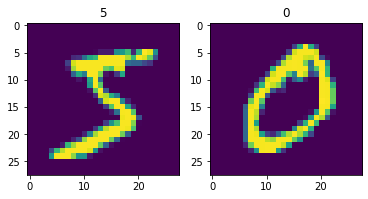

In [132]:
from matplotlib import pyplot as plt
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

Теперь давайте создадим свою собсвтенную модель

In [133]:
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__() # данная строка кода вызывает конструктор родительского класса
        self.flatten = nn.Flatten() # данный слой из матрицы 28х28 сделает нам один вектор из 784 чисел
        self.lin1 = nn.Linear(784, 128)
        self.lin2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.lin1(self.flatten(x))
        x = self.relu(x)
        x = self.lin2(x)
        return x

In [134]:
model = MnistModel()

In [135]:
print('У модели '+str(sum(p.numel() for p in model.parameters()))+' параметров')

У модели 101770 параметров


Такая небольшая модель у нас получилась. Давайте напишем цикл обучения.

In [136]:
# Чтобы обучать модель, нам нужна функция потерь. 
# Так как мы решаем задачу классификации, нам нужна перекрестная энтропия
loss_func = nn.CrossEntropyLoss()

# Чтобы делать шаги градиентного спуска, нам нужем оптимизатор
# В pytorch есть много видом оптимищации, используем Adam
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [137]:
for epoch in range(1,4): # всего у нас будет 3 эпохи (3 раза подряд пройдемся по всем батчам из трейна)
    for x_train, y_train in train_dataloader: # берем батч из трейн лоадера
        y_pred = model(x_train) # делаем предсказания
        loss = loss_func(y_pred, y_train) # считаем лосс
        loss.backward() # считаем градиенты обратным проходом
        optimizer.step() # обновляем параметры сети
        optimizer.zero_grad() # обнуляем посчитанные градиенты параметров
    
    mean_val_loss = [] # сюда будем складывать средний лосс по батчам
    val_accuracy = []
    with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
        for x_val, y_val in val_dataloader: # берем батч из вал лоадера
            y_pred = model(x_val) # делаем предсказания
            loss = nn.CrossEntropyLoss()(y_pred, y_val) # считаем лосс
            mean_val_loss.append(loss.numpy()) # добавляем в массив 
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
    print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
            epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
    )) # выводим статистику

Epoch: 1, loss: 0.11600582301616669, accuracy: 0.9637
Epoch: 2, loss: 0.08768309652805328, accuracy: 0.9746
Epoch: 3, loss: 0.10317087173461914, accuracy: 0.9694


Как мы можем видеть, уже после первой эпохи наша сеть дает 96% правильных овтетов на валидационной выборке, что не может не радовать! На третьей эпохе мы уже можем видеть эффект переобучения.

Подведем кратое резюме того, как нужно обучать нейронные сети в pytorch.

1) Создать датасет

2) Создать модель

3) Задать оптимизатор для модели

4) Задать функцию потерь, на минимизацию которой будет обучаться наша модель

5) При обучении сначала посчитать функцию потерь на батче

6) Подсчитать градиенты

7) Сделать шаг оптимизатора

8) Обнулить подсчитанные градиенты параметров

## Резюме

Теперь вы знакомы с библиотекой pytorch. Узнали про базовые операции над тензорами, узнали, как можно переводить массивы numpy в тензоры на pytorch, научились писать свои датасеты, модели. Научились обучать свои сети на pytorch. 

Вот хорошая книга по pytorch : https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf

А вот набор туториалов, которые позволят вам глубже познакомиться с pytorch : https://pytorch.org/tutorials/